<h3>Import Data</h3>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
cs = pd.read_csv('cspredict.csv')
cs.drop(columns =['Unnamed: 5'],inplace=True)
cs

Team  futureCS  GA    xGA  CS
0                   Arsenal        18  36  35.72  13
1               Aston Villa         6  57  49.71  10
2                   Chelsea         9  32  31.52  17
3            Crystal Palace         8  51  45.48   7
4                   Everton        10  50  46.18  10
..                      ...       ...  ..    ...  ..
80              Southampton         9  65  59.27   7
81                Tottenham         8  39  49.15  13
82                  Watford         9  59  63.29   7
83                 West Ham         7  55  65.66   7
84  Wolverhampton Wanderers        13  46  42.69   9

[85 rows x 5 columns]

<h3>Simple Linear Regression</h3>

In [265]:
from sklearn.linear_model import LinearRegression

Y = cs['futureCS']

lm_GA = LinearRegression()
X_GA = cs[['GA']]
lm_GA.fit(X_GA,Y)
Yhat_GA=lm_GA.predict(X_GA)

lm_xGA = LinearRegression()
X_xGA = cs[['xGA']]
lm_xGA.fit(X_xGA,Y)
Yhat_xGA=lm_xGA.predict(X_xGA)

lm_CS = LinearRegression()
X_CS = cs[['CS']]
lm_CS.fit(X_CS,Y)
Yhat_CS=lm_CS.predict(X_CS)

print (str(Yhat_GA[0:5])+ "\n" + str(Yhat_xGA[0:5]) + "\n" +  str(Yhat_CS[0:5]))

[13.50240077  9.58245034 14.249058   10.70243618 10.88910048]
[13.97012588 10.70627522 14.94998097 11.69312928 11.5298201 ]
[11.80964505 10.39392377 13.69727343  8.97820248 10.39392377]


In [172]:
print('GA R-square is: ', lm_GA.score(X_GA, Y))
print('xGA R-square is: ', lm_xGA.score(X_xGA, Y))
print('CS R-square is: ', lm_CS.score(X_CS, Y))

GA R-square is:  0.328566854096484
xGA R-square is:  0.3762320420884224
CS R-square is:  0.19885139906994354


In [173]:
print (lm_GA.intercept_)
print (lm_xGA.intercept_)
print (lm_CS.intercept_)

20.222315811746704
22.303560143580498
5.674852821107815


In [174]:
print (lm_GA.coef_)
print (lm_xGA.coef_)
print (lm_CS.coef_)

[-0.18666431]
[-0.23329883]
[0.47190709]


<h4>Model Evaluation using Visualization</h4>

In [175]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 21.8)

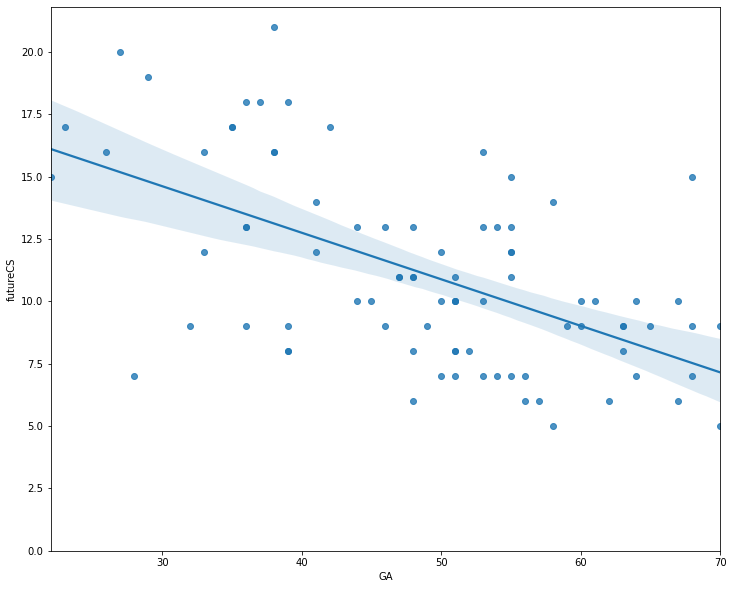

In [176]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="GA", y="futureCS", data=cs)
plt.ylim(0,)

(0.0, 21.8)

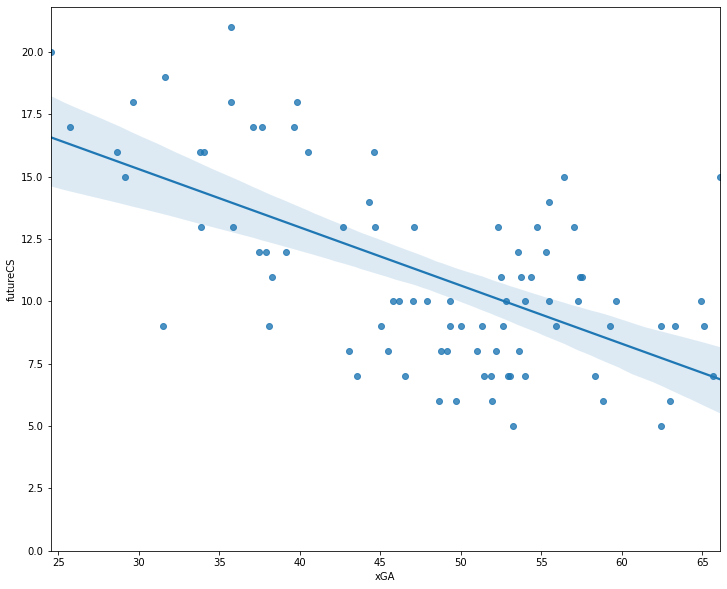

In [177]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="xGA", y="futureCS", data=cs)
plt.ylim(0,)

(0.0, 21.8)

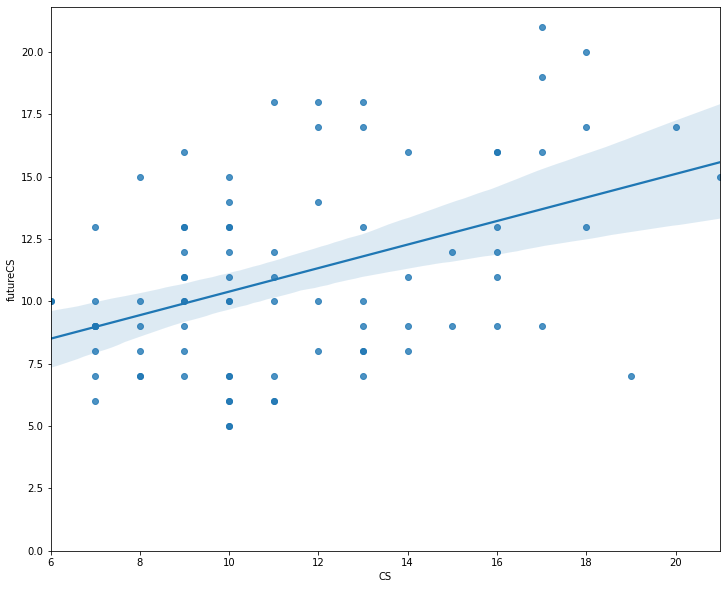

In [178]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="CS", y="futureCS", data=cs)
plt.ylim(0,)

In [179]:
cs.corr()

futureCS        GA       xGA        CS
futureCS  1.000000 -0.573208 -0.613378  0.445928
GA       -0.573208  1.000000  0.837022 -0.825462
xGA      -0.613378  0.837022  1.000000 -0.756294
CS        0.445928 -0.825462 -0.756294  1.000000

(0.0, 8.664259991699014)

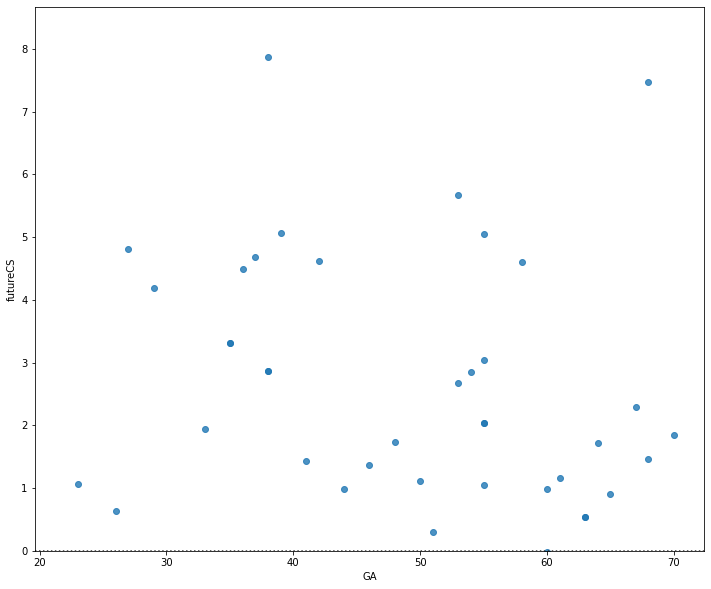

In [180]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x="GA", y="futureCS", data=cs)
plt.ylim(0,)

(0.0, 8.825765580630765)

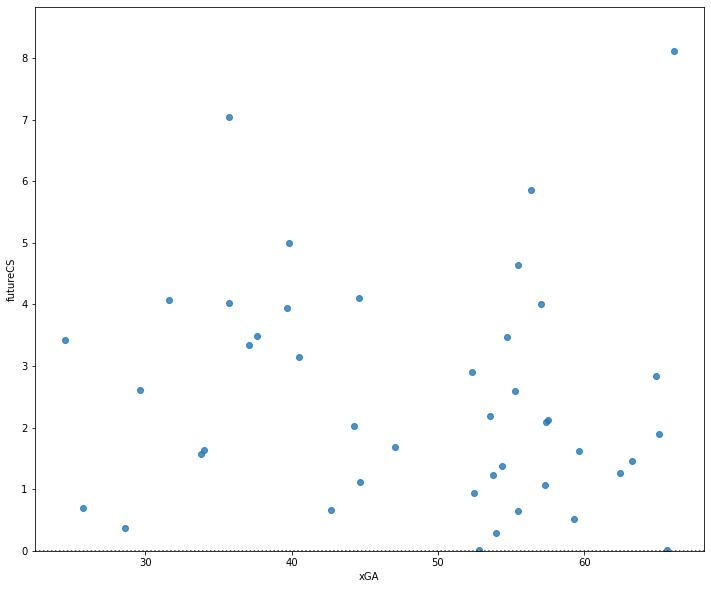

In [181]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x="xGA", y="futureCS", data=cs)
plt.ylim(0,)

(0.0, 8.049917279016796)

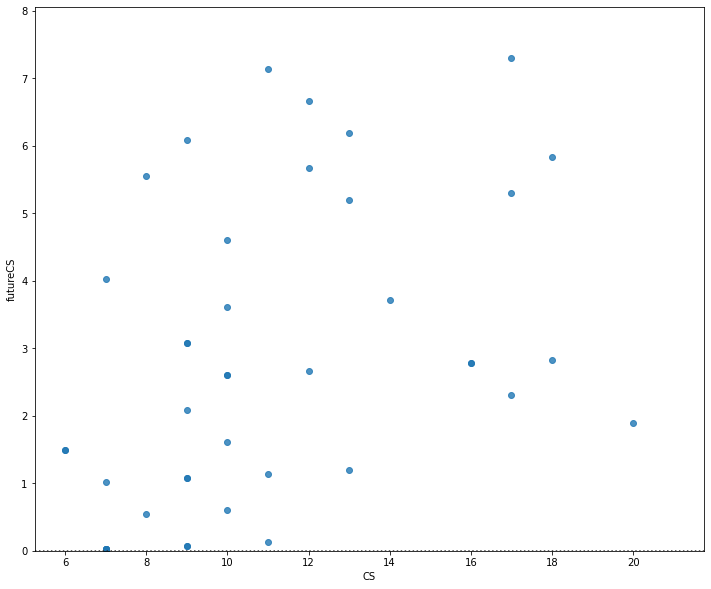

In [182]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x="CS", y="futureCS", data=cs)
plt.ylim(0,)

<h3>1/x Regression</h3>

In [352]:
ilm_xGA = LinearRegression()
X_ixGA = 1/cs[['xGA']]
ilm_xGA.fit(X_ixGA,Y)
Yhat_ixGA=ilm_GA.predict(X_ixGA)

In [264]:
Yhat_ixGA[0:5]

array([13.84775326, 10.28215504, 15.53594409, 11.12888719, 10.97805517])

In [269]:
print('inverse xGA R-square is: ', ilm_xGA.score(X_ixGA, Y))
print (ilm_xGA.intercept_)
print (ilm_xGA.coef_)

inverse xGA R-square is:  0.4233261159582101
1.1782830891020115
[452.55347459]


In [270]:
cs['inverse xGA'] = X_ixGA

(0.0, 22.929109901037705)

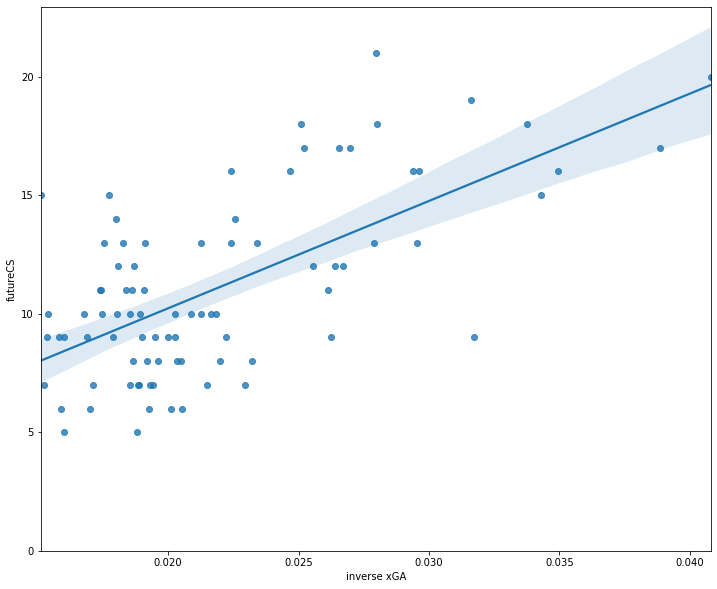

In [272]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="inverse xGA", y="futureCS", data=cs)
plt.ylim(0,)

In [293]:
pltdf = pd.DataFrame({'predCS': Yhat_ixGA, 'xGA':cs['xGA']})
pltdf

predCS    xGA
0   13.847753  35.72
1   10.282155  49.71
2   15.535944  31.52
3   11.128887  45.48
4   10.978055  46.18
..        ...    ...
80   8.813739  59.27
81  10.385882  49.15
82   8.328757  63.29
83   8.070660  65.66
84  11.779208  42.69

[85 rows x 2 columns]

(0.0, 21.8)

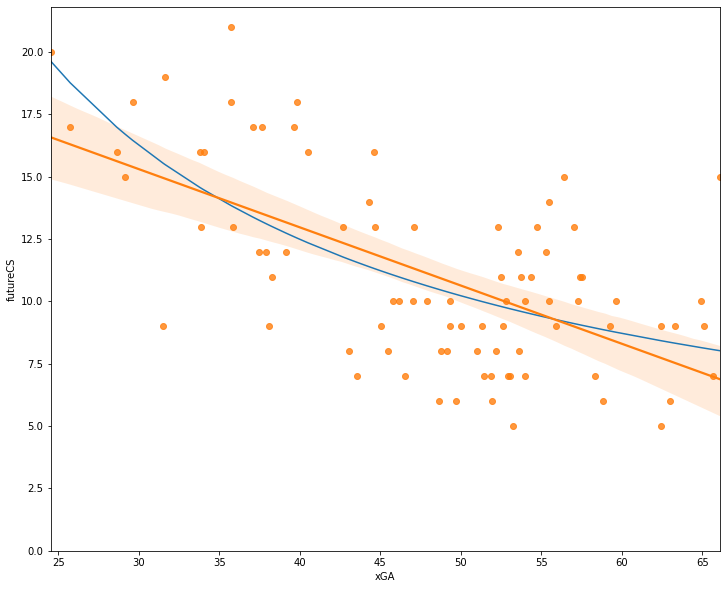

In [349]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.lineplot(x="xGA", y="predCS", data=pltdf)
sns.regplot(x="xGA", y="futureCS", data=cs)
plt.ylim(0,)

<h3>1/x Poly Regression </h3>

In [308]:
def PlotPolly2(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 0.05, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Future CS')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Future CS')

    plt.show()
    plt.close()

       2
799.7 x + 411.8 x + 1.664


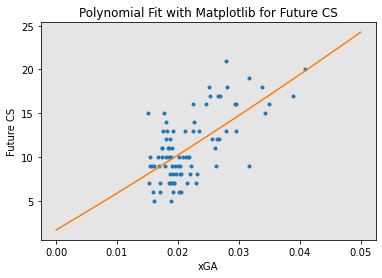

In [312]:
f = np.polyfit(cs['inverse xGA'], Y, 2)
p = np.poly1d(f)
print(p)
PlotPolly2(p,X_ixGA,Y, 'xGA')

In [313]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [318]:
Z_pr=pr.fit_transform(X_ixGA)
X_ixGA.shape

(85, 1)

In [319]:
Z_pr.shape

(85, 3)

In [320]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [321]:
pipe.fit(X_ixGA,Y)
ypipe=pipe.predict(X_ixGA)
ypipe[0:4]

array([13.81831193, 10.27106503, 15.53244465, 11.10445048])

In [323]:
pltdf2 = pd.DataFrame({'predCS': ypipe, 'xGA':cs['xGA']})
pltdf2

predCS    xGA
0   13.818312  35.72
1   10.271065  49.71
2   15.532445  31.52
3   11.104450  45.48
4   10.955586  46.18
..        ...    ...
80   8.839069  59.27
81  10.372856  49.15
82   8.369814  63.29
83   8.120836  65.66
84  11.748322  42.69

[85 rows x 2 columns]

(0.0, 21.8)

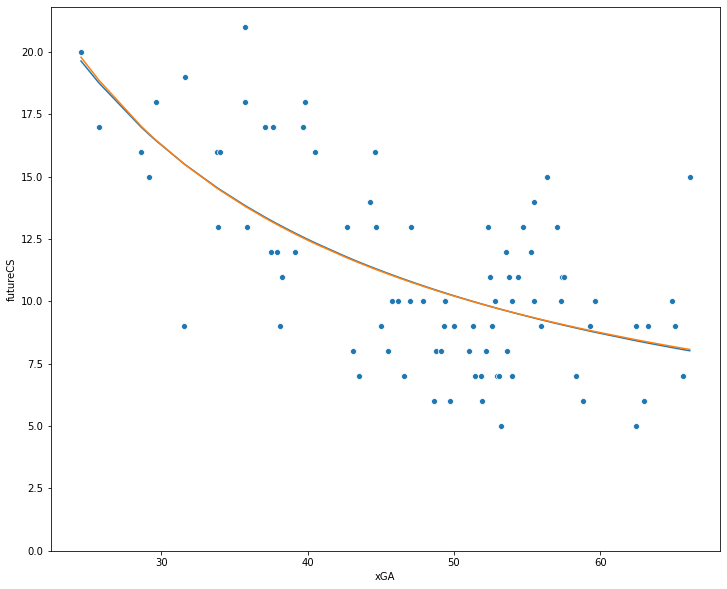

In [325]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.lineplot(x="xGA", y="predCS", data=pltdf)
sns.lineplot(x="xGA", y="predCS", data=pltdf2)
sns.scatterplot(x="xGA", y="futureCS", data=cs)
plt.ylim(0,)

poly 1/x model is nearly identical so drop it

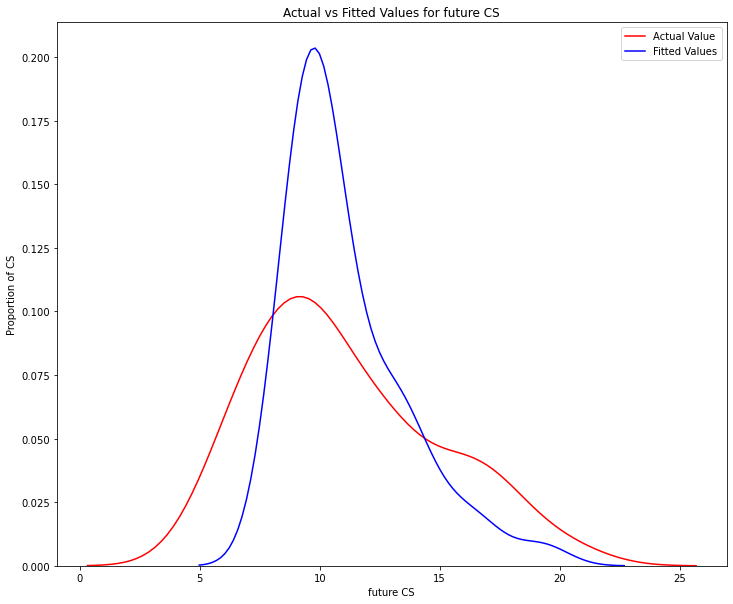

In [274]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_ixGA, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for future CS')
plt.xlabel('future CS')
plt.ylabel('Proportion of CS')

plt.show()
plt.close()

<h4>Multiple Linear Regression</h4>

In [183]:
from sklearn.linear_model import LinearRegression

mlrm = LinearRegression()
X_MLR = cs[['GA', 'xGA', 'CS']]

mlrm.fit(X_MLR, Y)
print (mlrm.intercept_)
print (mlrm.coef_)

27.316494010691382
[-0.10382776 -0.18510182 -0.19611247]


In [184]:
Yhat_MLR = mlrm.predict(X_MLR)

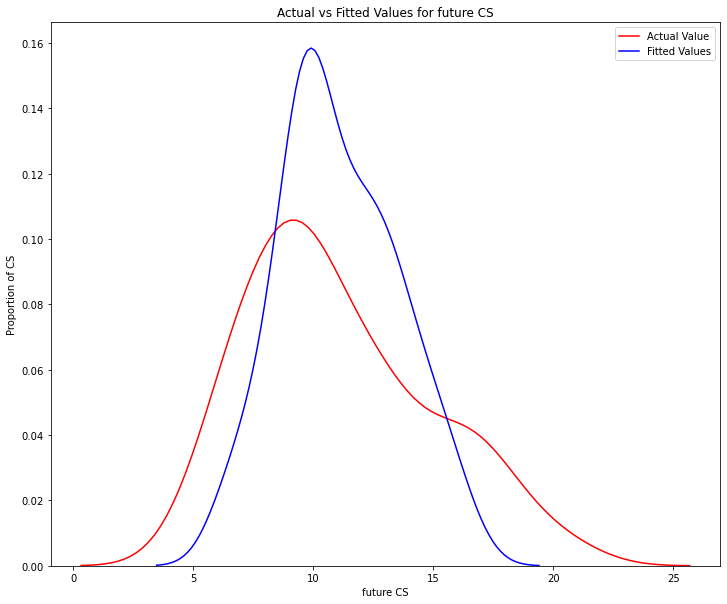

In [205]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_MLR, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for future CS')
plt.xlabel('future CS')
plt.ylabel('Proportion of CS')

plt.show()
plt.close()

In [206]:
from sklearn.linear_model import LinearRegression

mlrm2 = LinearRegression()
X_MLR2 = cs[['GA', 'xGA']]

mlrm2.fit(X_MLR2, Y)
print (mlrm2.intercept_)
print (mlrm2.coef_)

22.429929845945075
[-0.06504081 -0.16971336]


In [207]:
Yhat_MLR2 = mlrm2.predict(X_MLR2)

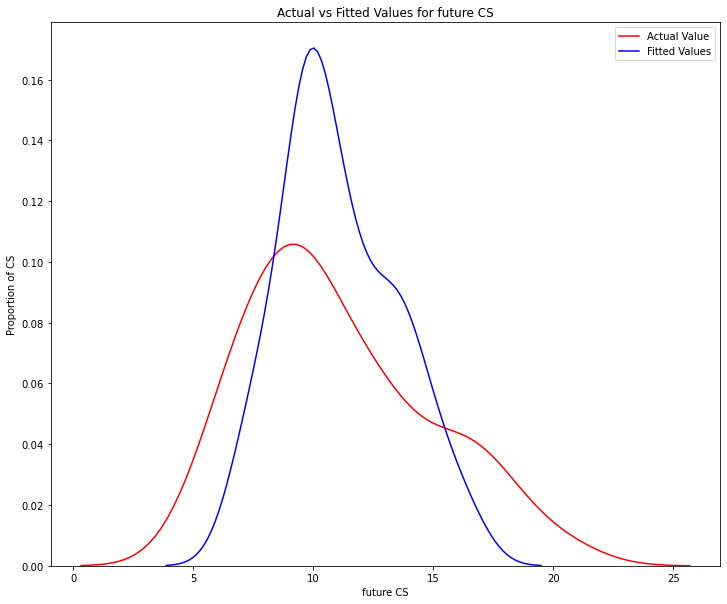

In [208]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_MLR2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for future CS')
plt.xlabel('future CS')
plt.ylabel('Proportion of CS')

plt.show()
plt.close()

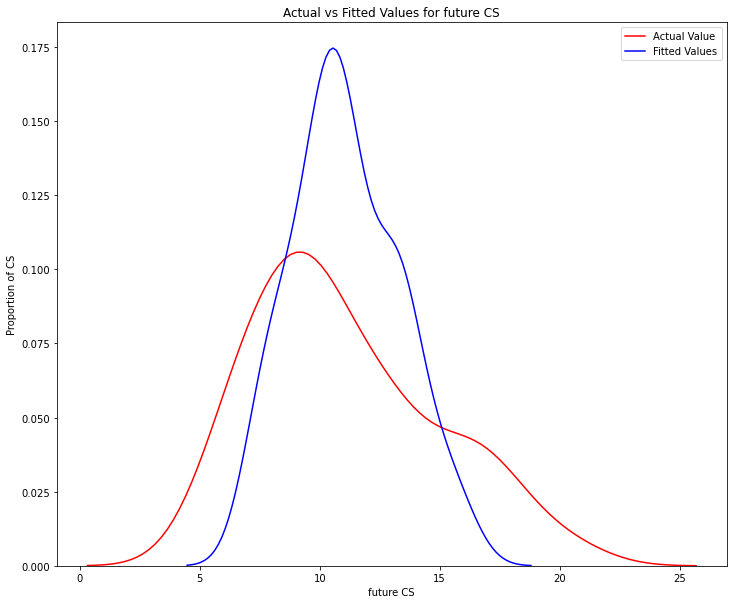

In [186]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(cs['futureCS'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_GA, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for future CS')
plt.xlabel('future CS')
plt.ylabel('Proportion of CS')

plt.show()
plt.close()

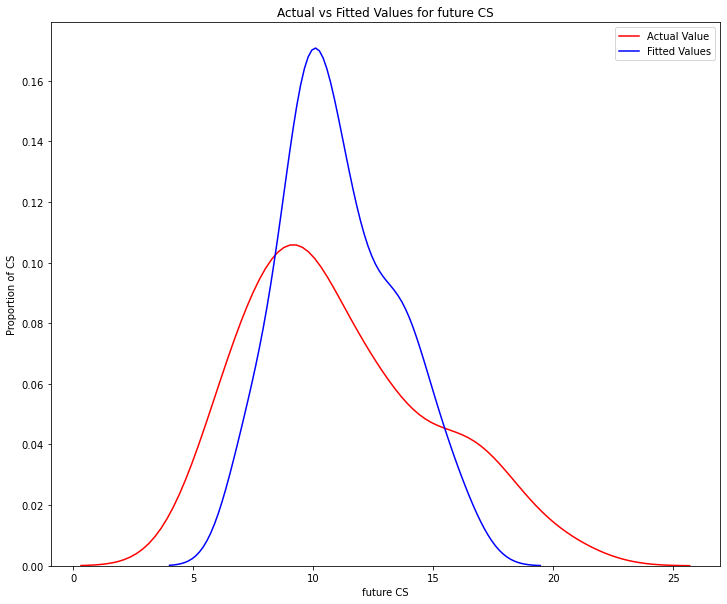

In [187]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(cs['futureCS'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_xGA, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for future CS')
plt.xlabel('future CS')
plt.ylabel('Proportion of CS')

plt.show()
plt.close()

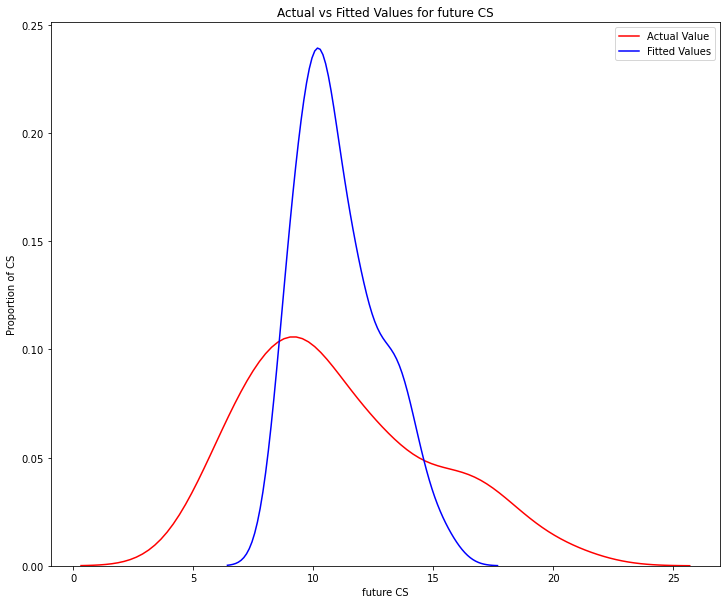

In [188]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(cs['futureCS'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_CS, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for future CS')
plt.xlabel('future CS')
plt.ylabel('Proportion of CS')

plt.show()
plt.close()

<h3>Simple Polynomial Regression</h3>

In [194]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(20, 75, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Future CS')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Future CS')

    plt.show()
    plt.close()

In [195]:
x_GA = cs['GA']
x_xGA = cs['xGA']
x_CS = cs['CS']

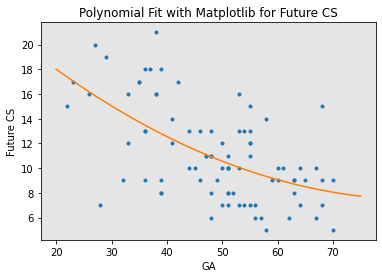

In [343]:
f = np.polyfit(x_GA, Y, 2)
p = np.poly1d(f)
PlotPolly(p, x_GA, Y, 'GA')

In [344]:
from sklearn.metrics import r2_score
print('GA poly R-square is: ', r2_score(Y, p(x_GA)))

GA poly R-square is:  0.33882871625587885


          2
0.008763 x - 1.044 x + 40.17


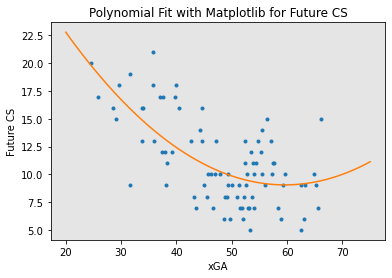

In [348]:
f = np.polyfit(x_xGA, Y, 2)
p = np.poly1d(f)
print(p)
PlotPolly(p, x_xGA, Y, 'xGA')

In [346]:
from sklearn.metrics import r2_score
print('xGA poly R-square is: ', r2_score(Y, p(x_xGA)))

xGA poly R-square is:  0.44469554153062296


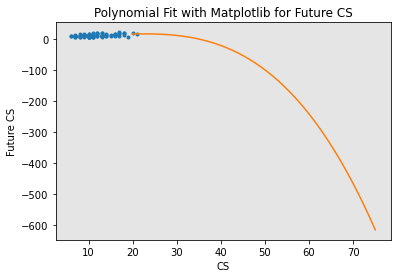

In [199]:
f = np.polyfit(x_CS, Y, 3)
p = np.poly1d(f)
PlotPolly(p, x_CS, Y, 'CS')

<h3>Multiple Polynomial Regression</h3>
<h5>mad overfit</h5>

In [232]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=3)
X_pr=pr.fit_transform(X_MLR)
X_pr.shape

(85, 20)

In [231]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(X_pr,Y)
ypipe=pipe.predict(X_pr)
ypipe[0:4]

array([17.99859236,  5.99480925,  9.00645918,  7.99953458])

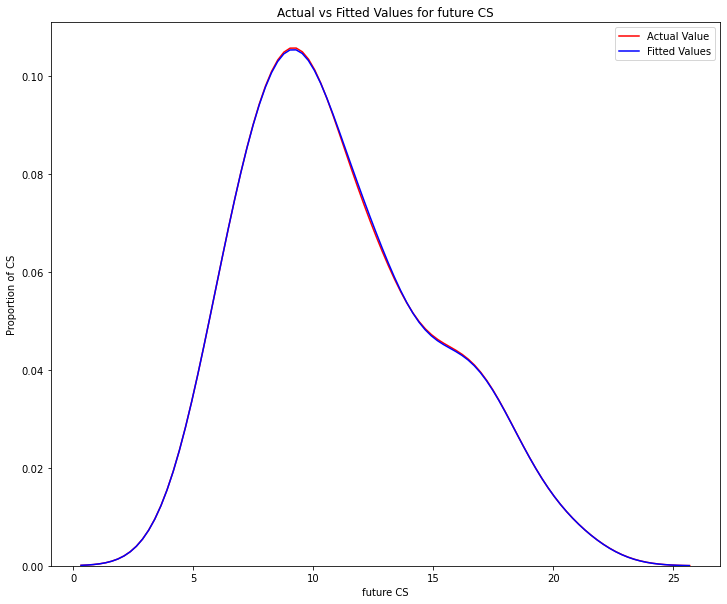

In [224]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for future CS')
plt.xlabel('future CS')
plt.ylabel('Proportion of CS')

plt.show()
plt.close()

<h3>Model Evaluation</h3>

In [350]:
from sklearn.metrics import r2_score

print('GA R-square is: ', lm_GA.score(X_GA, Y))
print('xGA R-square is: ', lm_xGA.score(X_xGA, Y))
print('CS R-square is: ', lm_CS.score(X_CS, Y))
print('MLR R-square is: ', mlrm.score(X_MLR, Y))
print('MLR2 R-square is: ', mlrm2.score(X_MLR2, Y))
print('inverse xGA R-square is: ', ilm_xGA.score(X_ixGA, Y))

print('xGA poly R-square is: ', r2_score(Y, p(x_xGA)))
print('inverse xGA poly R-square is: ', r2_score(Y, ypipe))

GA R-square is:  0.328566854096484
xGA R-square is:  0.3762320420884224
CS R-square is:  0.19885139906994354
MLR R-square is:  0.3986268455000753
MLR2 R-square is:  0.38817513891304856
inverse xGA R-square is:  0.4233261159582101
xGA poly R-square is:  0.44469554153062296
inverse xGA poly R-square is:  0.423394078541091


In [332]:
from sklearn.metrics import mean_squared_error

print('mean square error of GA is: ', mean_squared_error(Y, Yhat_GA))
print('mean square error of xGA is: ', mean_squared_error(Y, Yhat_xGA))
print('mean square error of CS is: ', mean_squared_error(Y, Yhat_CS))
print('mean square error of MLR is: ', mean_squared_error(Y, Yhat_MLR))
print('mean square error of MLR2 is: ', mean_squared_error(Y, Yhat_MLR2))
print('mean square error of inverse xGA is: ', mean_squared_error(Y,Yhat_ixGA))

mean square error of GA is:  9.68778127721217
mean square error of xGA is:  9.000043535010425
mean square error of CS is:  11.559382291011028
mean square error of MLR is:  8.676919842768049
mean square error of MLR2 is:  8.827722417836727
mean square error of inverse xGA is:  8.320546119836738


check AIC between inverse xGA and xGA poly

In [354]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

regr = OLS(Y, add_constant(X_ixGA)).fit()
print(regr.aic)

regr = OLS(Y, add_constant(p(x_xGA))).fit()
print(regr.aic)

425.3114214717983
422.10178940373964


In [359]:
from sklearn.metrics import r2_score

print('GA AIC is: ', OLS(Y, add_constant(X_GA)).fit().aic)
print('xGA AIC is: ', OLS(Y, add_constant(X_xGA)).fit().aic)
print('CS AIC is: ', OLS(Y, add_constant(X_CS)).fit().aic)
print('MLR AIC is: ', OLS(Y, add_constant(X_MLR)).fit().aic)
print('MLR2 AIC is: ', OLS(Y, add_constant(X_MLR2)).fit().aic)
print('inverse xGA AIC is: ', OLS(Y, add_constant(X_ixGA)).fit().aic)
print('xGA poly AIC is: ', OLS(Y, add_constant(p(x_xGA))).fit().aic)
print('inverse xGA poly AIC is: ', OLS(Y, add_constant(p(X_ixGA))).fit().aic)

GA AIC is:  438.24311213742095
xGA AIC is:  431.9840508813659
CS AIC is:  453.2568319213392
MLR AIC is:  432.8762123988905
MLR2 AIC is:  432.34079942896136
inverse xGA AIC is:  425.3114214717983
xGA poly AIC is:  422.10178940373964
inverse xGA poly AIC is:  425.3115168783835


<h3>2020-2021 Clean Sheet Prediction</h4>

In [360]:
cs1920 = pd.read_csv("20192020cs.csv")
cs1920.head()

Team  GA    xGA  CS
0      Arsenal  48  57.25  10
1  Aston Villa  67  71.60   7
2     Brighton  54  60.42   9
3      Burnley  50  53.84  15
4      Chelsea  54  41.09   9

In [366]:
yhati=ilm_xGA.predict(1/cs1920[['xGA']])
yhatx2=p(cs1920[['xGA']])

array([[ 9.09940475],
       [10.31582626],
       [ 9.05756228],
       [ 9.341032  ],
       [12.0499544 ],
       [ 9.09383966],
       [ 9.99530172],
       [10.25065483],
       [12.56296805],
       [13.52247403],
       [13.11269882],
       [ 9.53678858],
       [ 9.55075426],
       [ 9.13026692],
       [ 9.31255451],
       [ 9.71961504],
       [13.36941797]])

In [367]:
cs1920['predicted(1/x)']=yhati
cs1920['predicted(x^2)']=yhatx2
cs1920

Team  GA    xGA  CS  predicted(1/x)  predicted(x^2)
0                   Arsenal  48  57.25  10        9.083147        9.099405
1               Aston Villa  67  71.60   7        7.498862       10.315826
2                  Brighton  54  60.42   9        8.668410        9.057562
3                   Burnley  50  53.84  15        9.583808        9.341032
4                   Chelsea  54  41.09   9       12.191996       12.049954
5            Crystal Palace  50  57.39  10        9.063864        9.093840
6                   Everton  56  49.21   9       10.374655        9.995302
7                 Leicester  41  47.89  13       10.628136       10.250655
8                 Liverpool  33  39.57  15       12.615065       12.562968
9           Manchester City  35  37.00  17       13.409458       13.522474
10        Manchester United  36  38.06  13       13.068811       13.112699
11                Newcastle  58  67.03  11        7.929789        9.536789
12         Sheffield United  39  52.04  13        9.874545        9.550754
13              Southampton  60  56.59   9        9.175340        9.130267
14                Tottenham  47  54.13   8        9.538776        9.312555
15                 West Ham  62  68.32   7        7.802309        9.719615
16  Wolverhampton Wanderers  40  37.39  13       13.281880       13.369418